In [19]:
import csv

import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation 
import seaborn as sns
%matplotlib inline

import numpy as np
import pandas as pd
import os

In [20]:
JOLTS_Government = pd.read_csv('../SPYJobOpenings/JOLTSGovernment.csv')
JOLTS_Government = JOLTS_Government.rename(columns={"JTS9000JOL": "JOLTS_Government"})

JOLTSInformation = pd.read_csv('../SPYJobOpenings/JOLTSInformation.csv')
JOLTSInformation = JOLTSInformation.rename(columns={"JTU5100JOL": "JOLTS_Information"})

JOLTSDurableGoodsManuf = pd.read_csv('../SPYJobOpenings/JOLTSDurableGoodsManuf.csv')
JOLTSDurableGoodsManuf = JOLTSDurableGoodsManuf.rename(columns={"JTS3200JOL": "JOLTSDurableGoodsManuf"})

JOLTSFinanceANDInsurance = pd.read_csv('../SPYJobOpenings/JOLTSFinanceANDInsurance.csv')
JOLTSFinanceANDInsurance = JOLTSFinanceANDInsurance.rename(columns={"JTU5200JOL": "JOLTSFinanceANDInsurance"})

JOLTSHealthCareSocialAssistance = pd.read_csv('../SPYJobOpenings/JOLTSHealthCareSocialAssistance.csv')
JOLTSHealthCareSocialAssistance = JOLTSHealthCareSocialAssistance.rename(columns={"JTS6200JOL": "JOLTSHealthCareSocialAssistance"})

JOLTSLeisureANDHospitality = pd.read_csv('../SPYJobOpenings/JOLTSLeisureANDHospitality.csv')
JOLTSLeisureANDHospitality = JOLTSLeisureANDHospitality.rename(columns={"JTS7000JOL": "JOLTSLeisureANDHospitality"})

JOLTSNondurableGoodsManuf = pd.read_csv('../SPYJobOpenings/JOLTSNondurableGoodsManuf.csv')
JOLTSNondurableGoodsManuf = JOLTSNondurableGoodsManuf.rename(columns={"JTS3400JOL": "JOLTSNondurableGoodsManuf"})

JOLTSPrivEducationHealthServices = pd.read_csv('../SPYJobOpenings/JOLTSPrivEducationHealthServices.csv')
JOLTSPrivEducationHealthServices = JOLTSPrivEducationHealthServices.rename(columns={"JTS6000JOL": "JOLTSPrivEduHealthServices"})

JOLTSProfessional_AND_BusinessServices = pd.read_csv('../SPYJobOpenings/JOLTSProfessional_AND_BusinessServices.csv')
JOLTSProfessional_AND_BusinessServices = JOLTSProfessional_AND_BusinessServices.rename(columns={"JTS540099JOL": "JOLTSProf_AND_Bus.Services"})

JOLTSRetailTrade = pd.read_csv('../SPYJobOpenings/JOLTSRetailTrade.csv')
JOLTSRetailTrade = JOLTSRetailTrade.rename(columns={"JTS4400JOL": "JOLTSRetailTrade"})

JOLTSTransportion_Warehousing_Utilities = pd.read_csv('../SPYJobOpenings/JOLTSTransportion_Warehousing_Utilities.csv')
JOLTSTransportion_Warehousing_Utilities = JOLTSTransportion_Warehousing_Utilities.rename(columns={"JTU480099JOL": "JOLTSTransp_Warehousing_Utlts"})

JTSJOL_TOTAL = pd.read_csv('../SPYJobOpenings/JTSJOL_TOTAL.csv')
JTSJOL_TOTAL = JTSJOL_TOTAL.rename(columns={"JTSJOL": "JTSJOL_TOTAL"})

UNEMPLOY = pd.read_csv('../SPYJobOpenings/UNEMPLOY.csv')
UNEMPLOY = UNEMPLOY.rename(columns={"UNEMPLOY": "UNEMPLOYED"})


In [21]:
# Merge all DataFrames on a common column like "Date", using inner join to keep only matching dates
dfs = [
    JOLTS_Government, 
    JOLTSDurableGoodsManuf, 
    JOLTSInformation, 
    JOLTSFinanceANDInsurance, 
    JOLTSHealthCareSocialAssistance, 
    JOLTSLeisureANDHospitality, 
    JOLTSPrivEducationHealthServices, 
    JOLTSProfessional_AND_BusinessServices, 
    JOLTSRetailTrade,  
    JOLTSTransportion_Warehousing_Utilities, 
    JOLTSNondurableGoodsManuf, 
    JTSJOL_TOTAL, 
    UNEMPLOY
]

# Assuming "Date" is the common column in all dataframes
JOLTS_SECTORS_combined_df = dfs[0]
for df in dfs[1:]:
    JOLTS_SECTORS_combined_df = pd.merge(JOLTS_SECTORS_combined_df, df, on='DATE', how='inner')  # Use inner join to keep only matching dates

# Filter for dates starting from 1/1/2000 onwards
JOLTS_SECTORS_combined_df['DATE'] = pd.to_datetime(JOLTS_SECTORS_combined_df['DATE'])  # Convert Date column to datetime
JOLTS_SECTORS_combined_df = JOLTS_SECTORS_combined_df[JOLTS_SECTORS_combined_df['DATE'] >= '2000-01-01']  # Filter dates from 2000-01-01 onwards

# Inspect the combined dataframe
JOLTS_SECTORS_combined_df.head(2)

,DATE,JOLTS_Government,JOLTSDurableGoodsManuf,JOLTS_Information,JOLTSFinanceANDInsurance,JOLTSHealthCareSocialAssistance,JOLTSLeisureANDHospitality,JOLTSPrivEduHealthServices,JOLTSProf_AND_Bus.Services,JOLTSRetailTrade,JOLTSTransp_Warehousing_Utlts,JOLTSNondurableGoodsManuf,JTSJOL_TOTAL,UNEMPLOYED
0,2001-01-01,468.6666666666666667,278.0000000000000000,179.3333333333333333,219.6666666666666667,771.0000000000000000,650.0000000000000000,822.6666666666666667,940.3333333333333333,516.6666666666666667,141.6666666666666667,155.6666666666666667,5031.0000000000000000,6084.3333333333333333
1,2001-04-01,502.3333333333333333,219.0000000000000000,120.3333333333333333,205.6666666666666667,700.3333333333333333,518.6666666666666667,761.6666666666666667,784.0000000000000000,483.6666666666666667,126.0000000000000000,116.0000000000000000,4467.0000000000000000,6327.0000000000000000


In [22]:
JOLTS_SECTORS_combined_df.columns
# Show the columns in order to use it to format the intergers. 

Index(['DATE', 'JOLTS_Government', 'JOLTSDurableGoodsManuf',
       'JOLTS_Information', 'JOLTSFinanceANDInsurance',
       'JOLTSHealthCareSocialAssistance', 'JOLTSLeisureANDHospitality',
       'JOLTSPrivEduHealthServices', 'JOLTSProf_AND_Bus.Services',
       'JOLTSRetailTrade', 'JOLTSTransp_Warehousing_Utlts',
       'JOLTSNondurableGoodsManuf', 'JTSJOL_TOTAL', 'UNEMPLOYED'],
      dtype='object')

In [23]:
columns_to_round = ['JOLTS_Government', 'JOLTSDurableGoodsManuf',
       'JOLTS_Information', 'JOLTSFinanceANDInsurance',
       'JOLTSHealthCareSocialAssistance', 'JOLTSLeisureANDHospitality',
       'JOLTSPrivEduHealthServices', 'JOLTSProf_AND_Bus.Services',
       'JOLTSRetailTrade', 'JOLTSTransp_Warehousing_Utlts',
       'JOLTSNondurableGoodsManuf', 'JTSJOL_TOTAL', 'UNEMPLOYED']

# Convert the specified columns to numeric, coercing any errors
JOLTS_SECTORS_combined_df[columns_to_round] = JOLTS_SECTORS_combined_df[columns_to_round].apply(pd.to_numeric, errors='coerce')

# Round the specified columns to 1 decimal place
JOLTS_SECTORS_combined_df[columns_to_round] = JOLTS_SECTORS_combined_df[columns_to_round].round(1)
JOLTS_SECTORS_combined_df.head(3)

,DATE,JOLTS_Government,JOLTSDurableGoodsManuf,JOLTS_Information,JOLTSFinanceANDInsurance,JOLTSHealthCareSocialAssistance,JOLTSLeisureANDHospitality,JOLTSPrivEduHealthServices,JOLTSProf_AND_Bus.Services,JOLTSRetailTrade,JOLTSTransp_Warehousing_Utlts,JOLTSNondurableGoodsManuf,JTSJOL_TOTAL,UNEMPLOYED
0,2001-01-01,468.7,278.0,179.3,219.7,771.0,650.0,822.7,940.3,516.7,141.7,155.7,5031.0,6084.3
1,2001-04-01,502.3,219.0,120.3,205.7,700.3,518.7,761.7,784.0,483.7,126.0,116.0,4467.0,6327.0
2,2001-07-01,476.7,187.7,100.3,204.7,752.3,557.3,807.7,664.7,380.0,136.7,116.3,4180.7,6922.3


In [24]:
# Save to a new CSV file if needed
JOLTS_SECTORS_combined_df.to_csv('../SPYJobOpenings/JOLTS_SECTORS_combined_df.csv', index=False)

In [25]:
# Calculate the correlation matrix for the specified columns
JOLTS_Sectors_correlation_matrix = JOLTS_SECTORS_combined_df[columns_to_round].corr()

# Display the correlation matrix
JOLTS_Sectors_correlation_matrix 


,JOLTS_Government,JOLTSDurableGoodsManuf,JOLTS_Information,JOLTSFinanceANDInsurance,JOLTSHealthCareSocialAssistance,JOLTSLeisureANDHospitality,JOLTSPrivEduHealthServices,JOLTSProf_AND_Bus.Services,JOLTSRetailTrade,JOLTSTransp_Warehousing_Utlts,JOLTSNondurableGoodsManuf,JTSJOL_TOTAL,UNEMPLOYED
JOLTS_Government,1.000000,0.908440,0.728974,0.815482,0.976670,0.930962,0.977547,0.925365,0.778203,0.959185,0.885298,0.958944,-0.446908
JOLTSDurableGoodsManuf,0.908440,1.000000,0.873138,0.845404,0.926647,0.957127,0.926510,0.945429,0.826188,0.929580,0.939335,0.960314,-0.519531
JOLTS_Information,0.728974,0.873138,1.000000,0.746805,0.752088,0.812281,0.750472,0.814351,0.730009,0.765684,0.791866,0.814465,-0.533243
JOLTSFinanceANDInsurance,0.815482,0.845404,0.746805,1.000000,0.861529,0.882569,0.862693,0.858443,0.794269,0.821177,0.777860,0.882619,-0.609308
JOLTSHealthCareSocialAssistance,0.976670,0.926647,0.752088,0.861529,1.000000,0.959982,0.999642,0.955289,0.818152,0.956294,0.910198,0.980290,-0.498084
JOLTSLeisureANDHospitality,0.930962,0.957127,0.812281,0.882569,0.959982,1.000000,0.961256,0.977623,0.900741,0.966185,0.942821,0.991557,-0.545852
JOLTSPrivEduHealthServices,0.977547,0.926510,0.750472,0.862693,0.999642,0.961256,1.000000,0.957038,0.821039,0.958856,0.910425,0.981436,-0.495119
JOLTSProf_AND_Bus.Services,0.925365,0.945429,0.814351,0.858443,0.955289,0.977623,0.957038,1.000000,0.884174,0.958736,0.939071,0.985743,-0.494620
JOLTSRetailTrade,0.778203,0.826188,0.730009,0.794269,0.818152,0.900741,0.821039,0.884174,1.000000,0.865061,0.866316,0.892642,-0.488213
JOLTSTransp_Warehousing_Utlts,0.959185,0.929580,0.765684,0.821177,0.956294,0.966185,0.958856,0.958736,0.865061,1.000000,0.932913,0.976439,-0.426433


In [26]:
# Save to a new CSV file if needed
JOLTS_Sectors_correlation_matrix.to_csv('../SPYJobOpenings/JOLTS_Sectors_correlation_matrix.csv', index=False)

In [27]:
# Find the correlations for JTSJOL_TOTAL and UNEMPLOYED
correlation_with_total_unemployed = JOLTS_Sectors_correlation_matrix[['JTSJOL_TOTAL', 'UNEMPLOYED']]

# Sort the correlations to see which sectors affect them the most
correlation_with_total_unemployed = correlation_with_total_unemployed.sort_values(by=['JTSJOL_TOTAL', 'UNEMPLOYED'], ascending=False)

# Display the correlation of sectors with JTSJOL_TOTAL and UNEMPLOYED
correlation_with_total_unemployed


,JTSJOL_TOTAL,UNEMPLOYED
JTSJOL_TOTAL,1.000000,-0.524165
JOLTSLeisureANDHospitality,0.991557,-0.545852
JOLTSProf_AND_Bus.Services,0.985743,-0.494620
JOLTSPrivEduHealthServices,0.981436,-0.495119
JOLTSHealthCareSocialAssistance,0.980290,-0.498084
JOLTSTransp_Warehousing_Utlts,0.976439,-0.426433
JOLTSDurableGoodsManuf,0.960314,-0.519531
JOLTS_Government,0.958944,-0.446908
JOLTSNondurableGoodsManuf,0.947390,-0.439919
JOLTSRetailTrade,0.892642,-0.488213


In [28]:
# Function to remove duplicate sector pairs (where Sector_1 and Sector_2 are reversed)
def remove_duplicates(df):
    df['Sector_Pair'] = df.apply(lambda x: tuple(sorted([x['Sector_1'], x['Sector_2']])), axis=1)
    df = df.drop_duplicates(subset='Sector_Pair').drop(columns='Sector_Pair')
    return df.reset_index(drop=True)

# Filter correlations above 0.80
strong_positive_correlations = JOLTS_Sectors_correlation_matrix[JOLTS_Sectors_correlation_matrix > 0.80].stack().reset_index()
strong_positive_correlations.columns = ['Sector_1', 'Sector_2', 'Correlation']
strong_positive_correlations = strong_positive_correlations[strong_positive_correlations['Sector_1'] != strong_positive_correlations['Sector_2']]
strong_positive_correlations = remove_duplicates(strong_positive_correlations)

# Filter correlations with no relationship (between -0.1 and 0.1)
no_relationship_correlations = JOLTS_Sectors_correlation_matrix[(JOLTS_Sectors_correlation_matrix > -0.1) & (JOLTS_Sectors_correlation_matrix < 0.1)].stack().reset_index()
no_relationship_correlations.columns = ['Sector_1', 'Sector_2', 'Correlation']
no_relationship_correlations = no_relationship_correlations[no_relationship_correlations['Sector_1'] != no_relationship_correlations['Sector_2']]
no_relationship_correlations = remove_duplicates(no_relationship_correlations)

# Filter negative correlations
negative_correlations = JOLTS_Sectors_correlation_matrix[JOLTS_Sectors_correlation_matrix < 0].stack().reset_index()
negative_correlations.columns = ['Sector_1', 'Sector_2', 'Correlation']
negative_correlations = remove_duplicates(negative_correlations)

# Export each to a CSV file
strong_positive_correlations.to_csv('JOLTSSectors_strong_positive_correlations.csv', index=False)
no_relationship_correlations.to_csv('JOLTSSectors_no_relationship_correlations.csv', index=False)
negative_correlations.to_csv('JOLTSSectors_negative_correlations.csv', index=False)

print("\nAll correlations have been exported to CSV files.")



All correlations have been exported to CSV files.


In [29]:
# Sort strong positive correlations in descending order
strong_positive_correlations = strong_positive_correlations.sort_values(by='Correlation', ascending=False)

print("Strong Positive Correlations (Above 0.80):")
strong_positive_correlations

Strong Positive Correlations (Above 0.80):


,Sector_1,Sector_2,Correlation
29,JOLTSHealthCareSocialAssistance,JOLTSPrivEduHealthServices,0.999642
40,JOLTSLeisureANDHospitality,JTSJOL_TOTAL,0.991557
49,JOLTSProf_AND_Bus.Services,JTSJOL_TOTAL,0.985743
45,JOLTSPrivEduHealthServices,JTSJOL_TOTAL,0.981436
34,JOLTSHealthCareSocialAssistance,JTSJOL_TOTAL,0.980290
36,JOLTSLeisureANDHospitality,JOLTSProf_AND_Bus.Services,0.977623
4,JOLTS_Government,JOLTSPrivEduHealthServices,0.977547
2,JOLTS_Government,JOLTSHealthCareSocialAssistance,0.976670
54,JOLTSTransp_Warehousing_Utlts,JTSJOL_TOTAL,0.976439
38,JOLTSLeisureANDHospitality,JOLTSTransp_Warehousing_Utlts,0.966185


In [30]:
print("\nNo Significant Relationship (Correlations between -0.1 and 0.1):")
no_relationship_correlations


No Significant Relationship (Correlations between -0.1 and 0.1):


,Sector_1,Sector_2,Correlation


JOLTSFinanceANDInsurance (-0.61):

This is the strongest negative correlation in your table. It suggests that as job openings in the finance and insurance sector increase, unemployment decreases significantly. A correlation of -0.61 indicates a moderately strong inverse relationship.
JOLTSLeisureANDHospitality (-0.55) and JOLTS_Information (-0.53):

Both sectors also show a moderate inverse relationship with unemployment. This means that an increase in job openings or activity in these sectors is associated with a reduction in unemployment.

Key Takeaways:
Negative Correlations: All sectors show a negative correlation with unemployment, meaning as jobs increase in these sectors, unemployment decreases.

Sector Importance: The finance and insurance sector has the strongest inverse relationship with unemployment in this table. This could indicate that changes in job openings in this sector have a larger impact on unemployment compared to others.

In [31]:
# Sort negative correlations in ascending order (to show the most negative first)
negative_correlations = negative_correlations.sort_values(by='Correlation', ascending=True)

print("\nNegative Correlations:")
negative_correlations


Negative Correlations:


,Sector_1,Sector_2,Correlation
3,JOLTSFinanceANDInsurance,UNEMPLOYED,-0.609308
5,JOLTSLeisureANDHospitality,UNEMPLOYED,-0.545852
2,JOLTS_Information,UNEMPLOYED,-0.533243
11,JTSJOL_TOTAL,UNEMPLOYED,-0.524165
1,JOLTSDurableGoodsManuf,UNEMPLOYED,-0.519531
4,JOLTSHealthCareSocialAssistance,UNEMPLOYED,-0.498084
6,JOLTSPrivEduHealthServices,UNEMPLOYED,-0.495119
7,JOLTSProf_AND_Bus.Services,UNEMPLOYED,-0.494620
8,JOLTSRetailTrade,UNEMPLOYED,-0.488213
0,JOLTS_Government,UNEMPLOYED,-0.446908


In [32]:
# Step 1: Convert DATE column to datetime and extract the year
JOLTS_SECTORS_combined_df['DATE'] = pd.to_datetime(JOLTS_SECTORS_combined_df['DATE'])
JOLTS_SECTORS_combined_df['Year'] = JOLTS_SECTORS_combined_df['DATE'].dt.year

# Step 2: Initialize an empty list to store correlation data
correlation_by_year = []

# Step 3: Group the data by Year and calculate the correlation matrix for each year
for year, group in JOLTS_SECTORS_combined_df.groupby('Year'):
    # Calculate correlation matrix for the current year
    yearly_corr = group[columns_to_round].corr()
    
    # Flatten the correlation matrix and store the year
    yearly_corr = yearly_corr.stack().reset_index()
    yearly_corr.columns = ['Sector_1', 'Sector_2', 'Correlation']
    yearly_corr['Year'] = year
    
    # Append the correlation for the current year to the list
    correlation_by_year.append(yearly_corr)

# Step 4: Concatenate the results into a single DataFrame
correlation_by_year_df = pd.concat(correlation_by_year)

# Step 5: Export the correlation data to a CSV file
correlation_by_year_df.to_csv('JOLTSSector_correlations_by_year.csv', index=False)

correlation_by_year_df

,Sector_1,Sector_2,Correlation,Year
0,JOLTS_Government,JOLTS_Government,1.000000,2001
1,JOLTS_Government,JOLTSDurableGoodsManuf,0.190273,2001
2,JOLTS_Government,JOLTS_Information,0.017768,2001
3,JOLTS_Government,JOLTSFinanceANDInsurance,0.404046,2001
4,JOLTS_Government,JOLTSHealthCareSocialAssistance,-0.331794,2001
...,...,...,...,...
164,UNEMPLOYED,JOLTSRetailTrade,-1.000000,2024
165,UNEMPLOYED,JOLTSTransp_Warehousing_Utlts,1.000000,2024
166,UNEMPLOYED,JOLTSNondurableGoodsManuf,-1.000000,2024
167,UNEMPLOYED,JTSJOL_TOTAL,-1.000000,2024


/var/folders/3z/z694z0m10zzdtngkgj2cbnsc0000gp/T/ipykernel_35895/3818840100.py:6: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  JOLTS_SECTORS_combined_df['JTSJOL_TOTAL_pct_change'] = JOLTS_SECTORS_combined_df['JTSJOL_TOTAL'].pct_change() * 100
/var/folders/3z/z694z0m10zzdtngkgj2cbnsc0000gp/T/ipykernel_35895/3818840100.py:7: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  JOLTS_SECTORS_combined_df['UNEMPLOYED_pct_change'] = JOLTS_SECTORS_combined_df['UNEMPLOYED'].pct_change() * 100


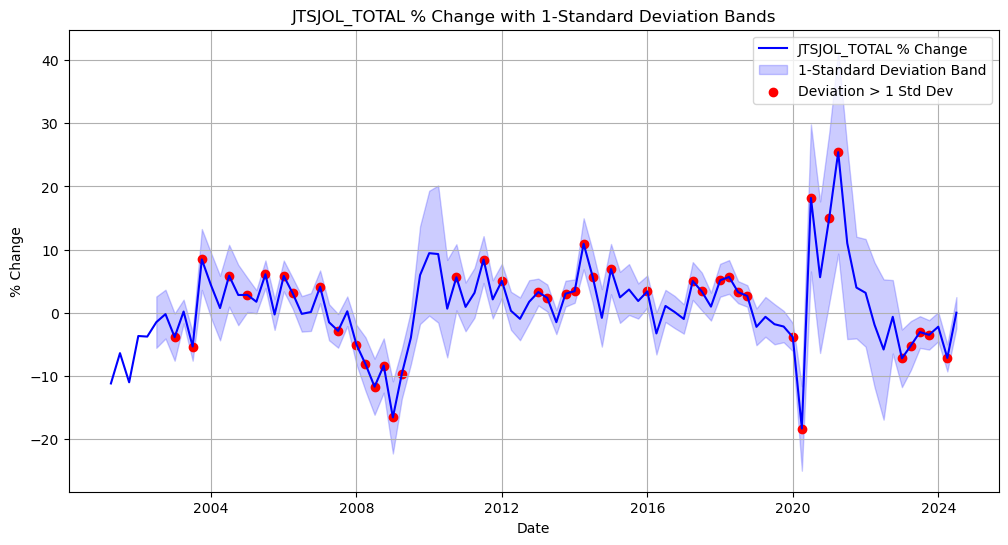

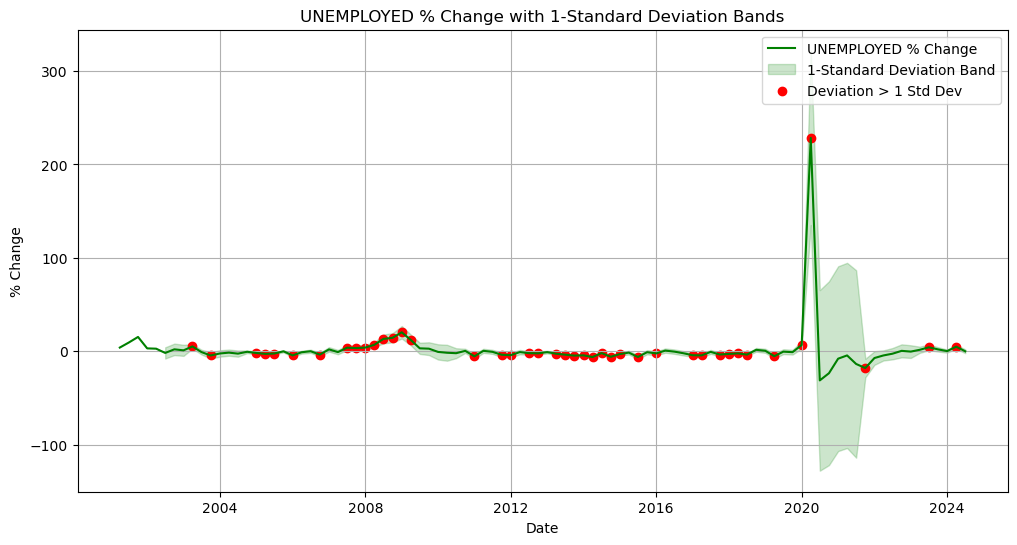

In [33]:
# Ensure DATE is a datetime object and set as index for time-series plotting
JOLTS_SECTORS_combined_df['DATE'] = pd.to_datetime(JOLTS_SECTORS_combined_df['DATE'])
JOLTS_SECTORS_combined_df.set_index('DATE', inplace=True)

# Step 1: Calculate percentage change for JTSJOL_TOTAL and UNEMPLOYED
JOLTS_SECTORS_combined_df['JTSJOL_TOTAL_pct_change'] = JOLTS_SECTORS_combined_df['JTSJOL_TOTAL'].pct_change() * 100
JOLTS_SECTORS_combined_df['UNEMPLOYED_pct_change'] = JOLTS_SECTORS_combined_df['UNEMPLOYED'].pct_change() * 100

# Step 2: Calculate rolling mean and 1-standard deviation for percentage change
# Step 2: Calculate rolling mean and 1-standard deviation for percentage change
window_size = 6  # Changed to 6 months
JOLTS_SECTORS_combined_df['JTSJOL_TOTAL_std'] = JOLTS_SECTORS_combined_df['JTSJOL_TOTAL_pct_change'].rolling(window=window_size).std()
JOLTS_SECTORS_combined_df['UNEMPLOYED_std'] = JOLTS_SECTORS_combined_df['UNEMPLOYED_pct_change'].rolling(window=window_size).std()


# Step 3: Plotting the percentage changes with 1-standard deviation bands

# Plot for JTSJOL_TOTAL
plt.figure(figsize=(12, 6))
plt.plot(JOLTS_SECTORS_combined_df.index, JOLTS_SECTORS_combined_df['JTSJOL_TOTAL_pct_change'], label='JTSJOL_TOTAL % Change', color='blue')
plt.fill_between(JOLTS_SECTORS_combined_df.index, 
                 JOLTS_SECTORS_combined_df['JTSJOL_TOTAL_pct_change'] - JOLTS_SECTORS_combined_df['JTSJOL_TOTAL_std'], 
                 JOLTS_SECTORS_combined_df['JTSJOL_TOTAL_pct_change'] + JOLTS_SECTORS_combined_df['JTSJOL_TOTAL_std'], 
                 color='blue', alpha=0.2, label='1-Standard Deviation Band')

# Highlight deviations beyond 1 standard deviation
deviation_highlight = np.abs(JOLTS_SECTORS_combined_df['JTSJOL_TOTAL_pct_change']) > JOLTS_SECTORS_combined_df['JTSJOL_TOTAL_std']
plt.scatter(JOLTS_SECTORS_combined_df.index[deviation_highlight], 
            JOLTS_SECTORS_combined_df['JTSJOL_TOTAL_pct_change'][deviation_highlight], 
            color='red', label='Deviation > 1 Std Dev')

plt.title('JTSJOL_TOTAL % Change with 1-Standard Deviation Bands')
plt.xlabel('Date')
plt.ylabel('% Change')
plt.legend()
plt.grid(True)
plt.show()

# Plot for UNEMPLOYED
plt.figure(figsize=(12, 6))
plt.plot(JOLTS_SECTORS_combined_df.index, JOLTS_SECTORS_combined_df['UNEMPLOYED_pct_change'], label='UNEMPLOYED % Change', color='green')
plt.fill_between(JOLTS_SECTORS_combined_df.index, 
                 JOLTS_SECTORS_combined_df['UNEMPLOYED_pct_change'] - JOLTS_SECTORS_combined_df['UNEMPLOYED_std'], 
                 JOLTS_SECTORS_combined_df['UNEMPLOYED_pct_change'] + JOLTS_SECTORS_combined_df['UNEMPLOYED_std'], 
                 color='green', alpha=0.2, label='1-Standard Deviation Band')

# Highlight deviations beyond 1 standard deviation
deviation_highlight_unemployed = np.abs(JOLTS_SECTORS_combined_df['UNEMPLOYED_pct_change']) > JOLTS_SECTORS_combined_df['UNEMPLOYED_std']
plt.scatter(JOLTS_SECTORS_combined_df.index[deviation_highlight_unemployed], 
            JOLTS_SECTORS_combined_df['UNEMPLOYED_pct_change'][deviation_highlight_unemployed], 
            color='red', label='Deviation > 1 Std Dev')

plt.title('UNEMPLOYED % Change with 1-Standard Deviation Bands')
plt.xlabel('Date')
plt.ylabel('% Change')
plt.legend()
plt.grid(True)
plt.show()

# Step 4: Save to a new CSV file if needed
JOLTS_SECTORS_combined_df.to_csv('JOLTS_SECTORS_combined_df_with_pct_changes_and_std.csv', index=True)


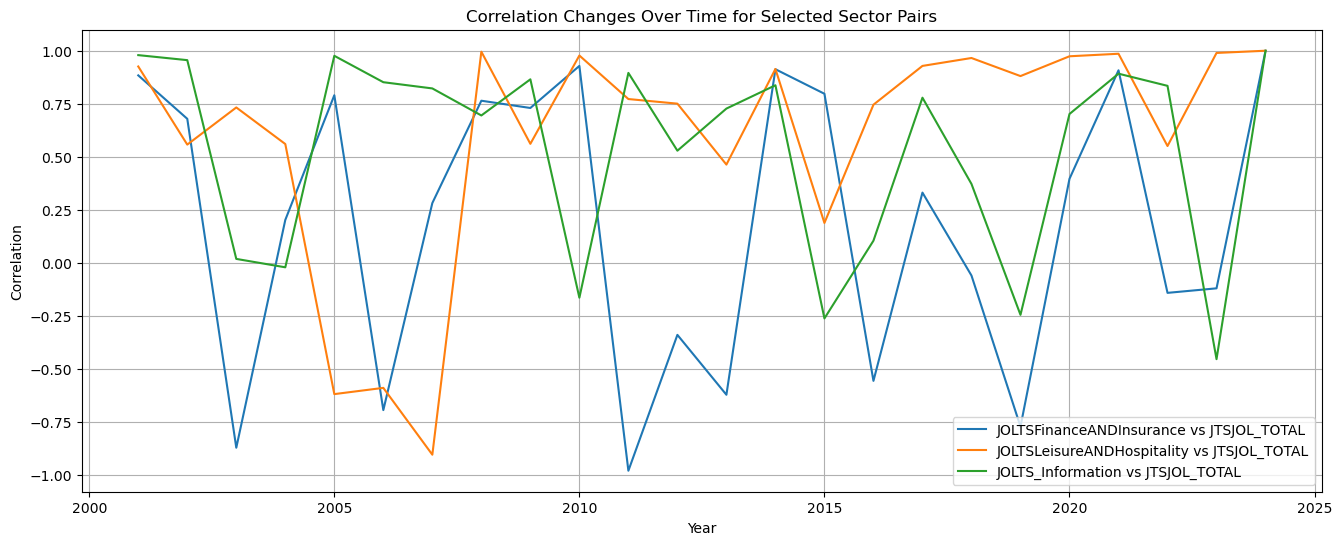

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter for sector pairs of interest (e.g., 'JOLTSFinanceANDInsurance' vs 'UNEMPLOYED', etc.)
sector_pairs = [('JOLTSFinanceANDInsurance', 'JTSJOL_TOTAL'), 
                ('JOLTSLeisureANDHospitality', 'JTSJOL_TOTAL'),
                ('JOLTS_Information', 'JTSJOL_TOTAL')]

# Create a line plot for each sector pair
plt.figure(figsize=(16, 6))

for sector_1, sector_2 in sector_pairs:
    # Filter the correlation data for the given sector pair
    sector_corr_data = correlation_by_year_df[(correlation_by_year_df['Sector_1'] == sector_1) & 
                                              (correlation_by_year_df['Sector_2'] == sector_2)]
    
    # Plot the correlation changes over time
    plt.plot(sector_corr_data['Year'], sector_corr_data['Correlation'], label=f'{sector_1} vs {sector_2}')

# Customize the plot
plt.title('Correlation Changes Over Time for Selected Sector Pairs')
plt.xlabel('Year')
plt.ylabel('Correlation')
plt.legend()
plt.grid(True)
plt.show()


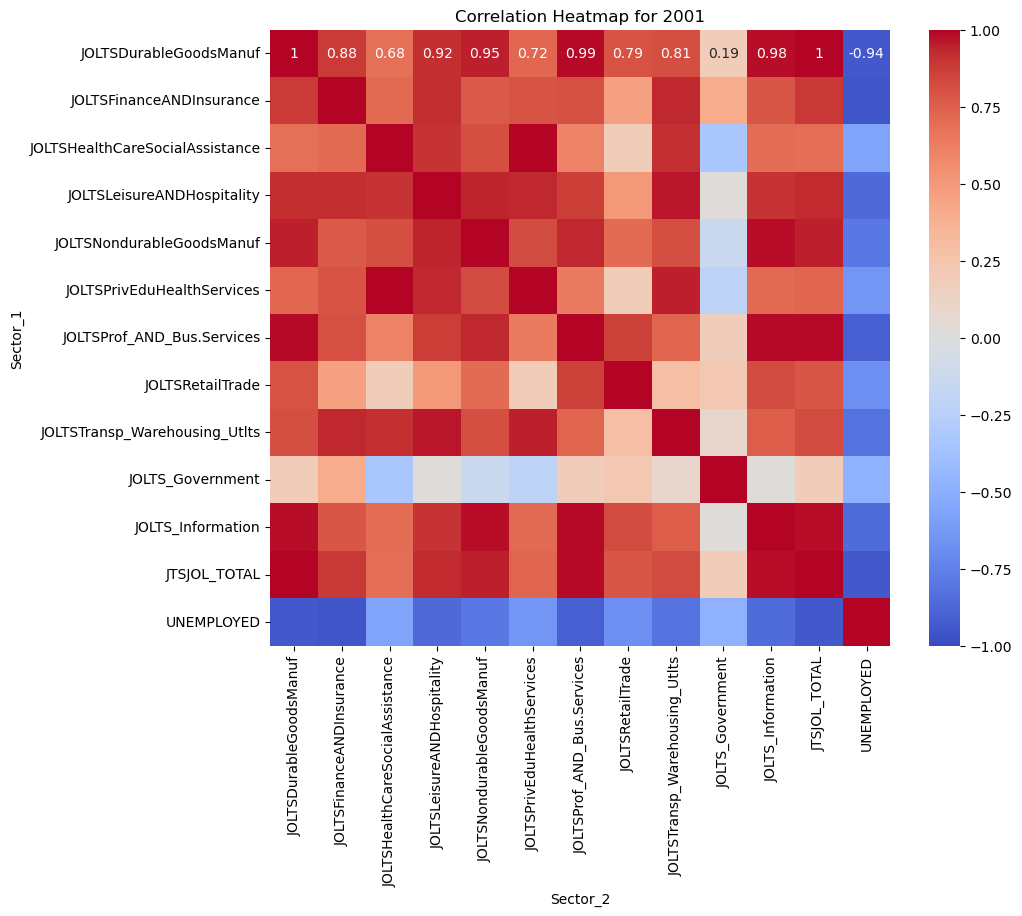

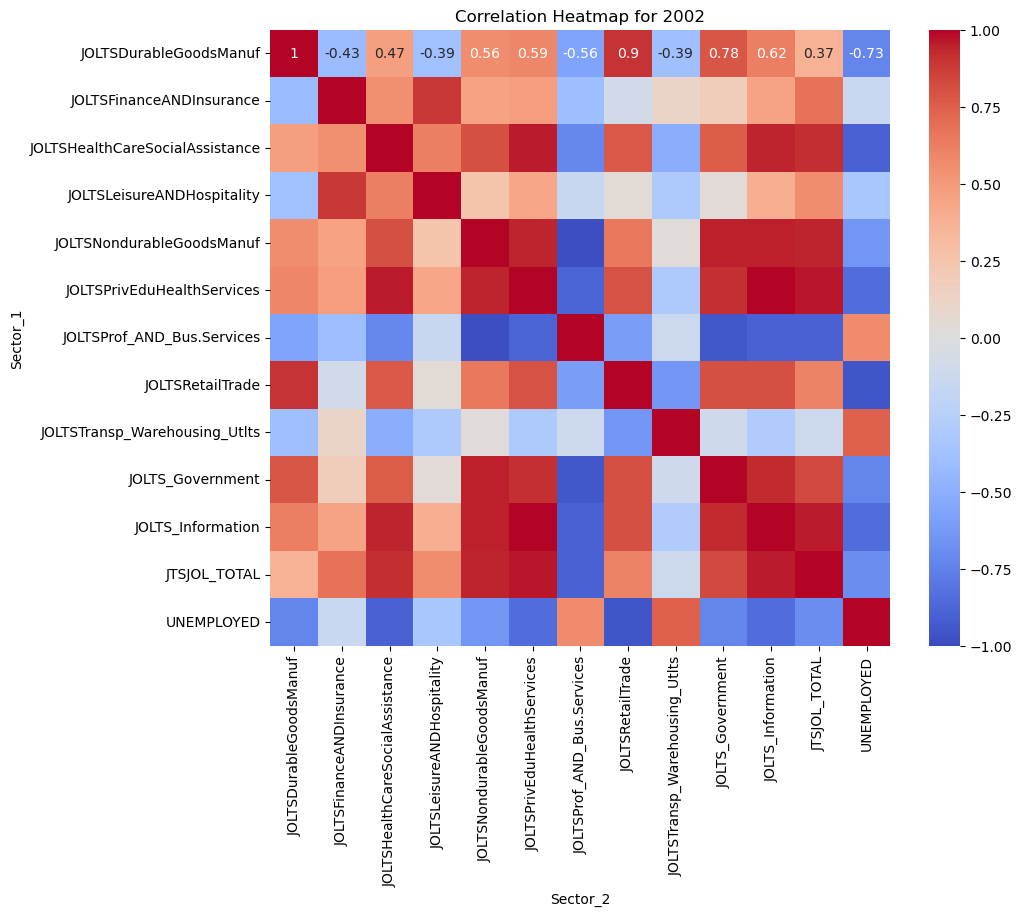

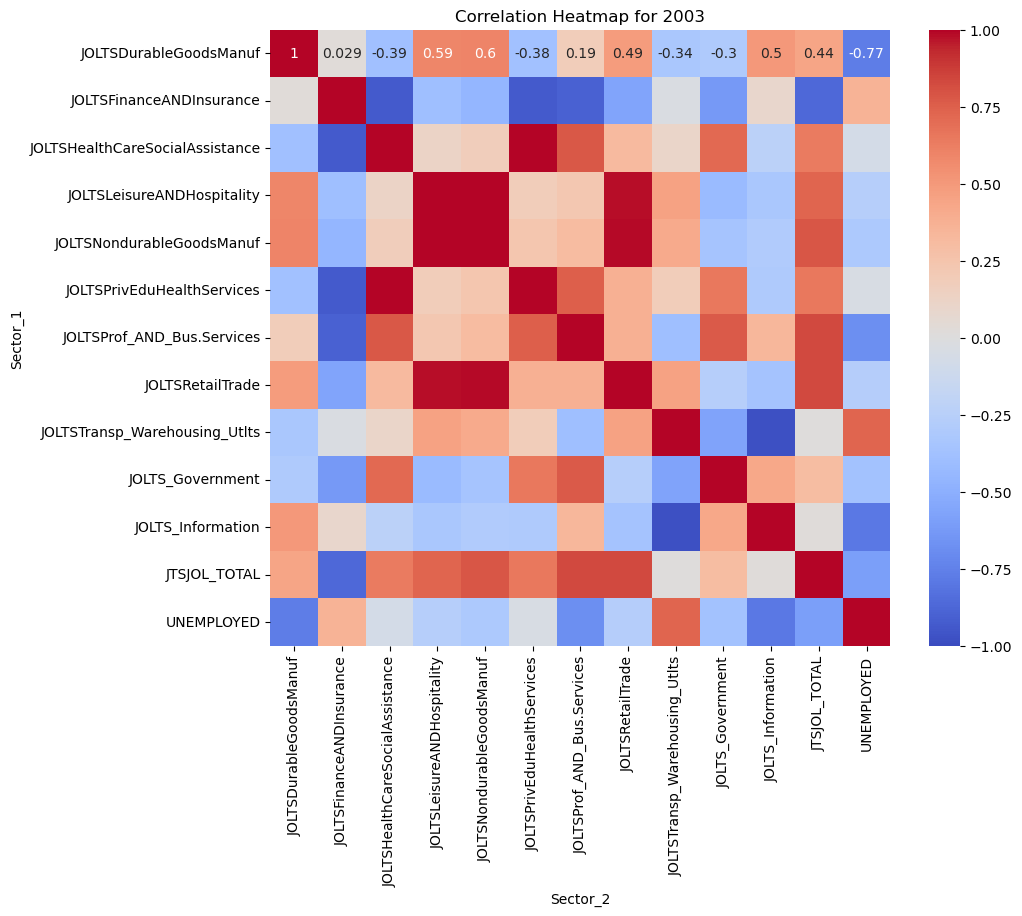

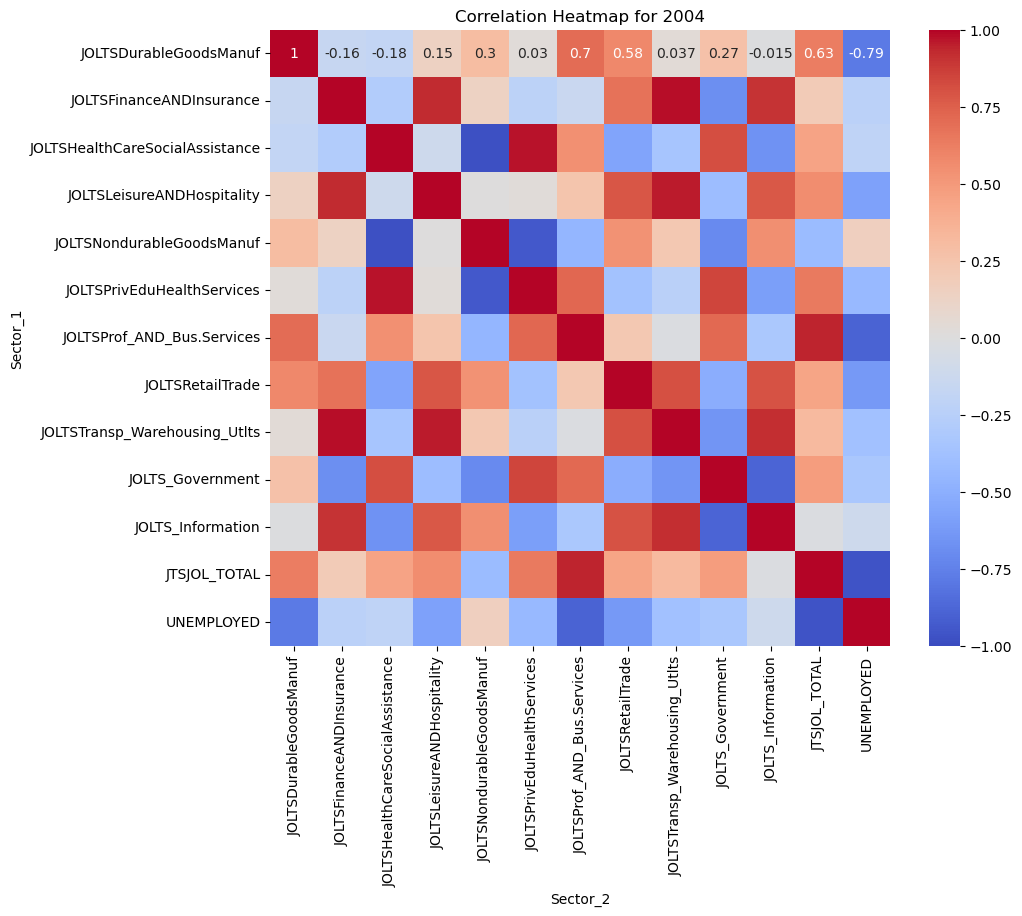

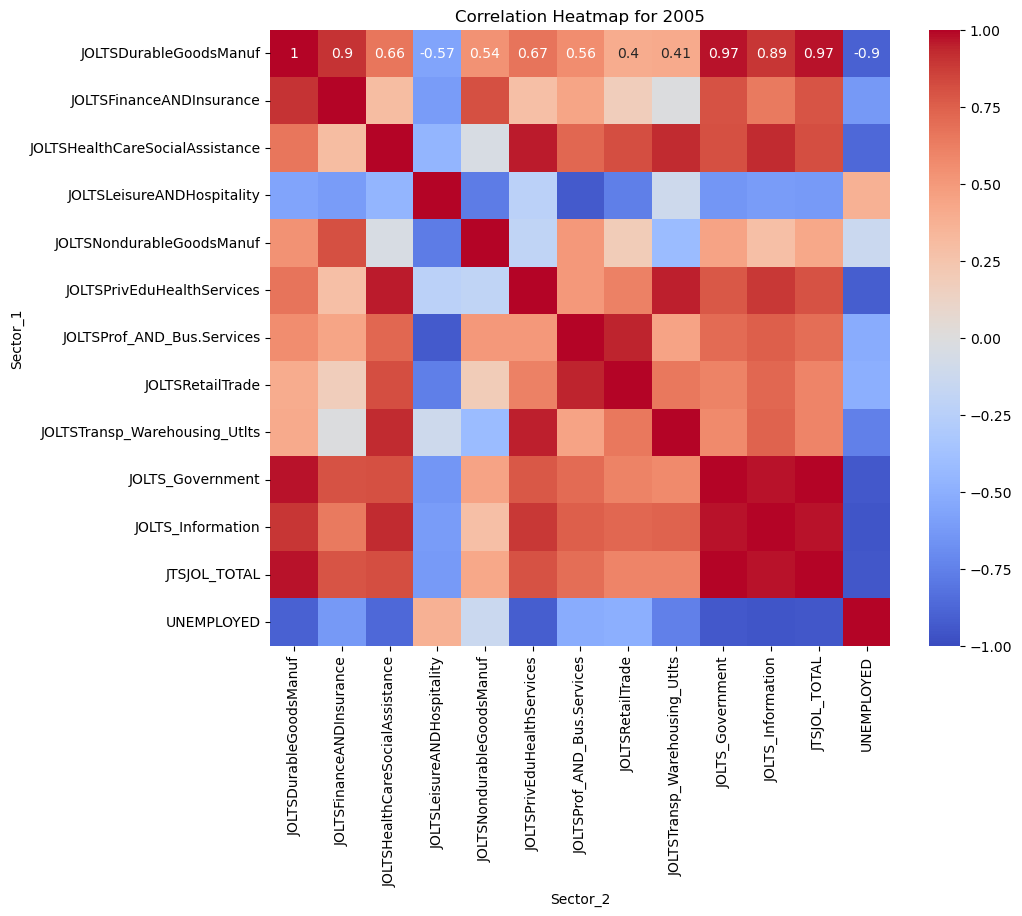

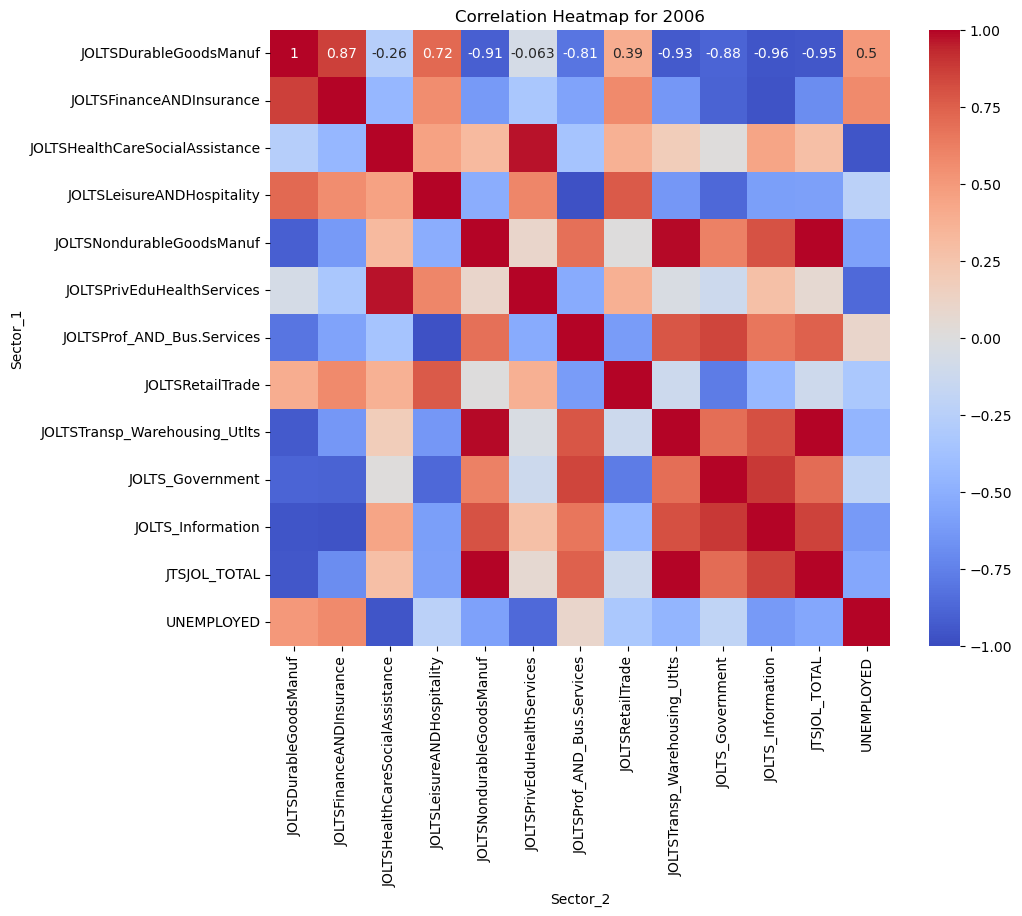

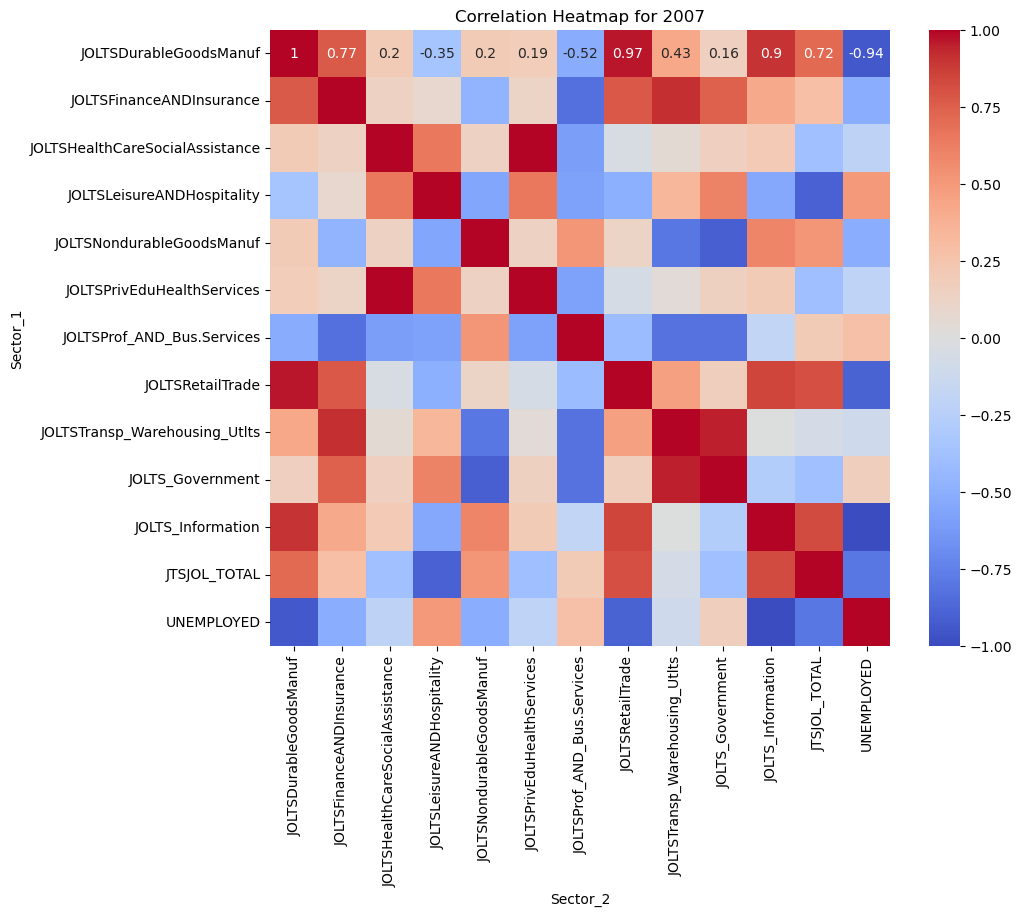

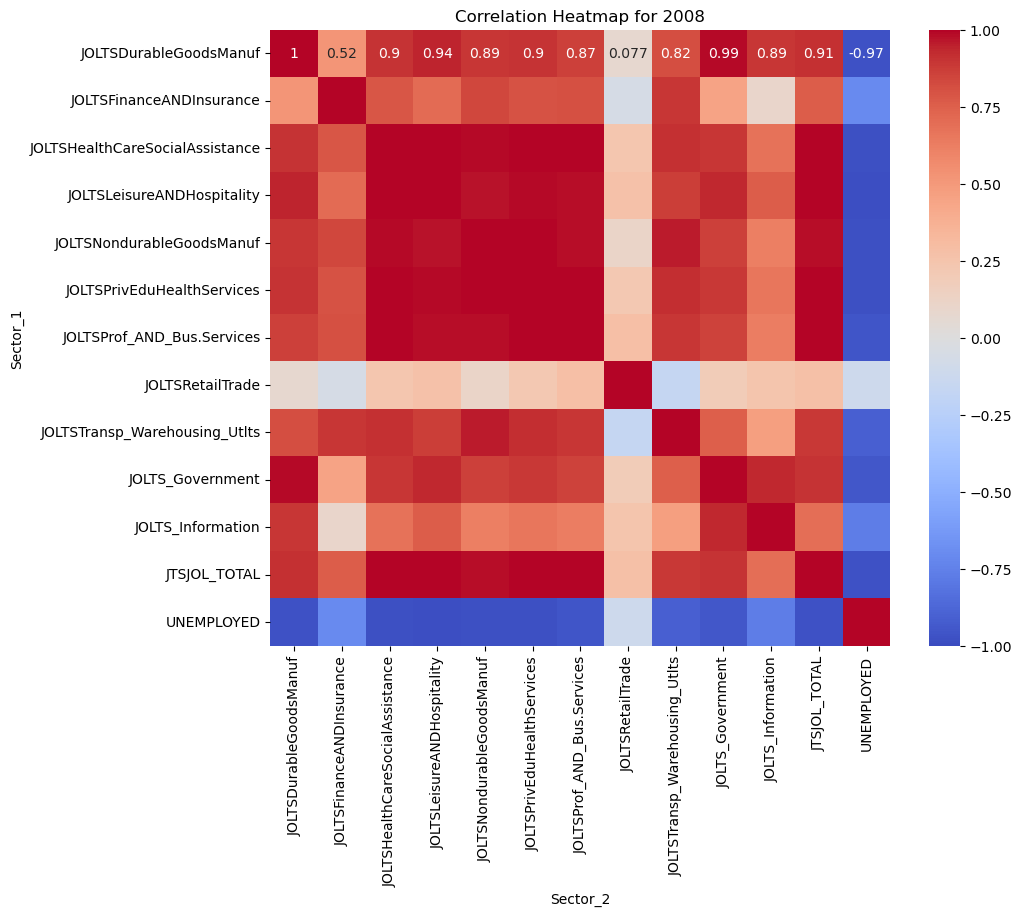

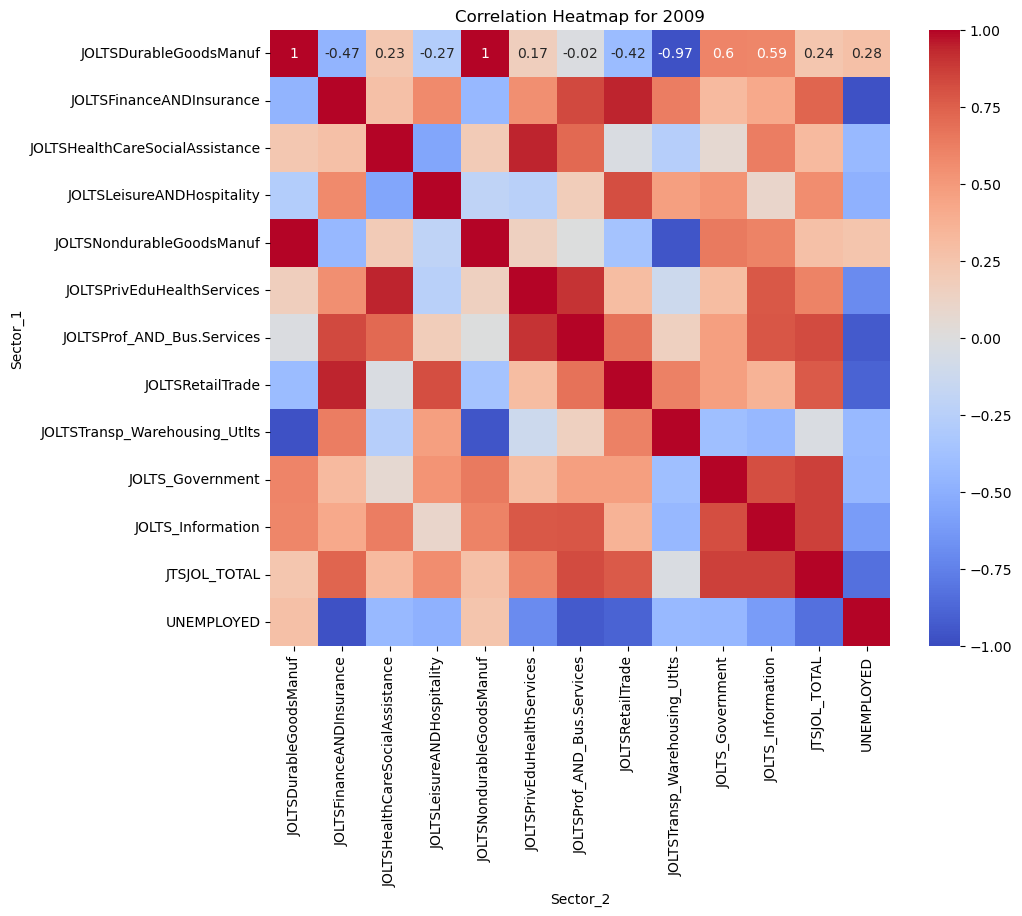

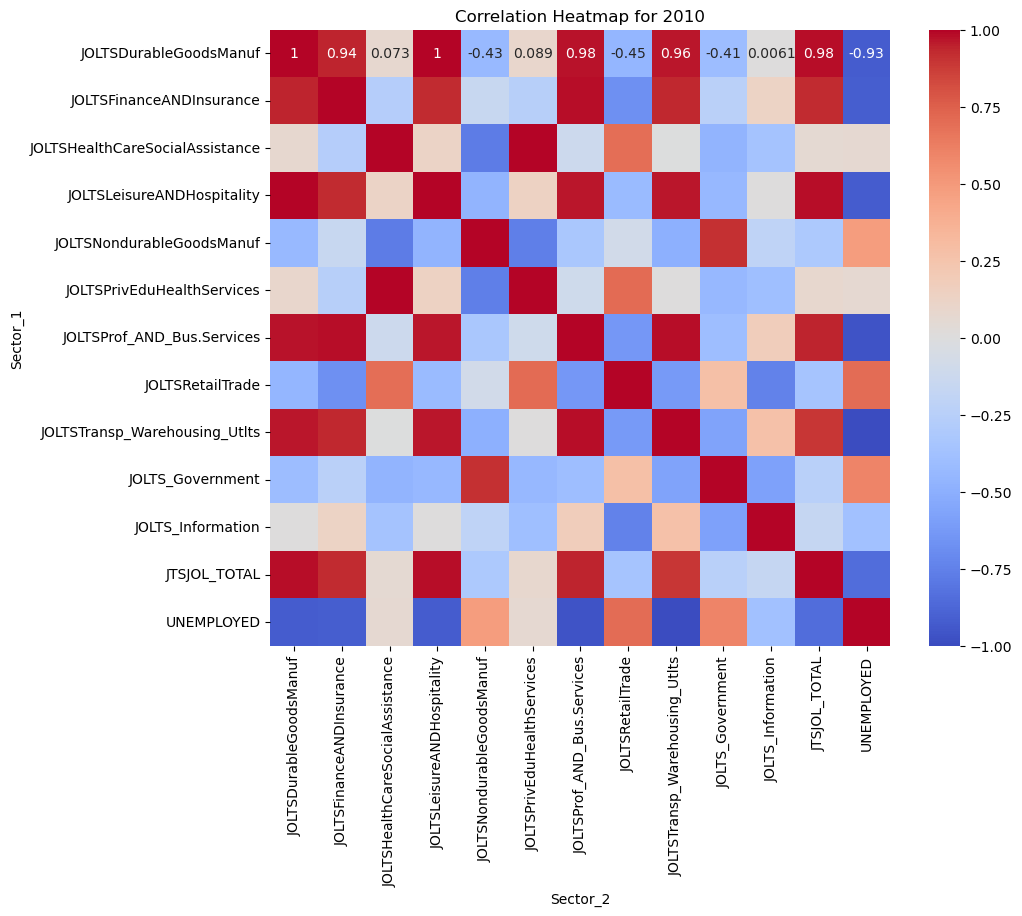

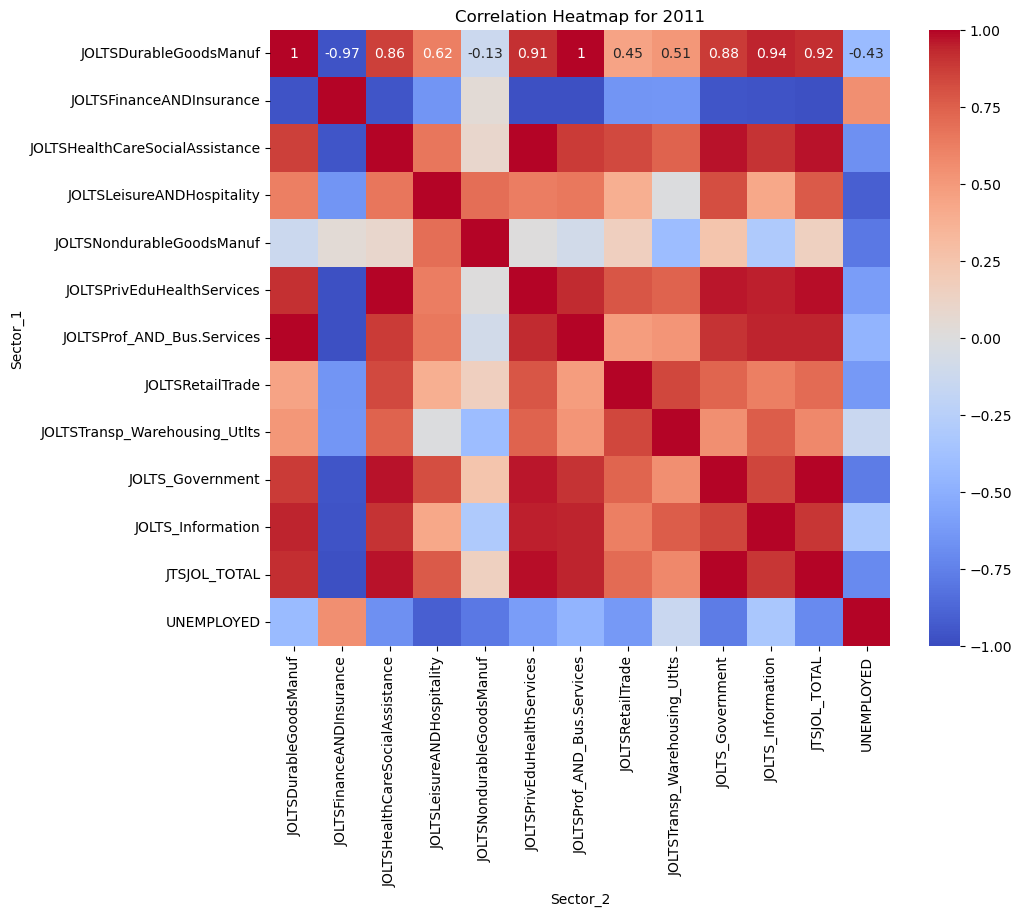

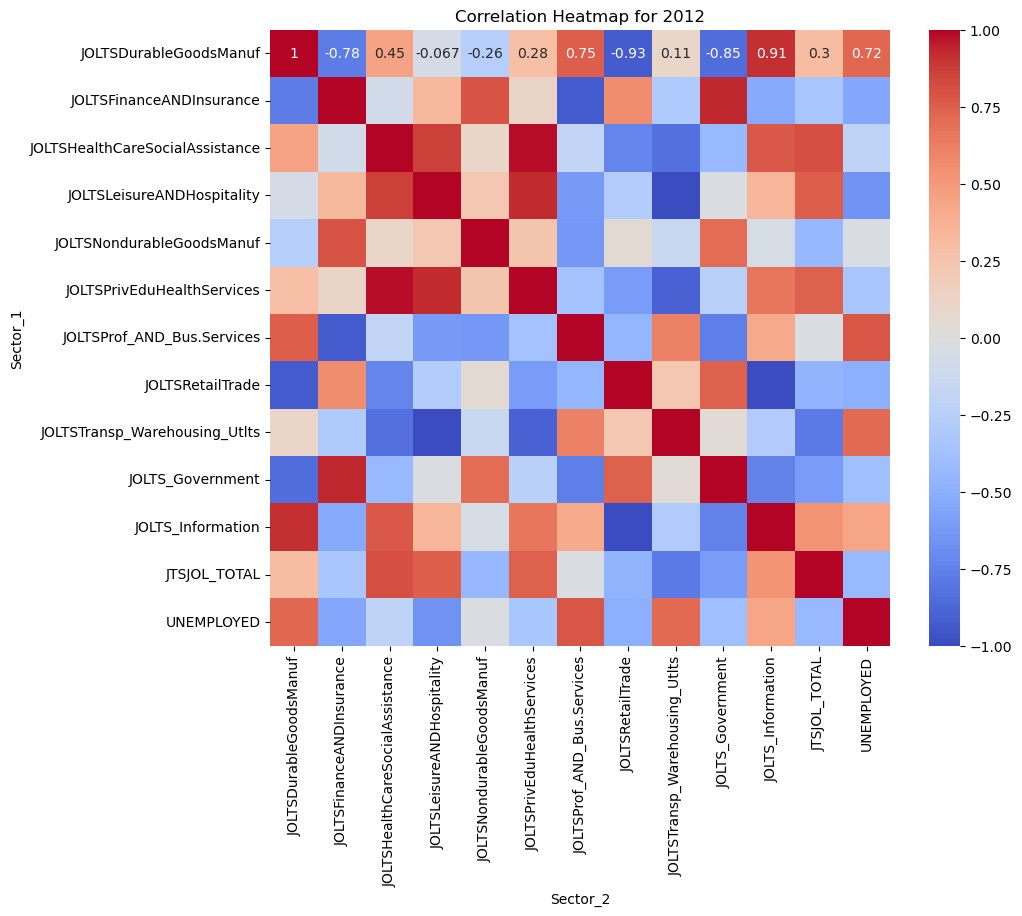

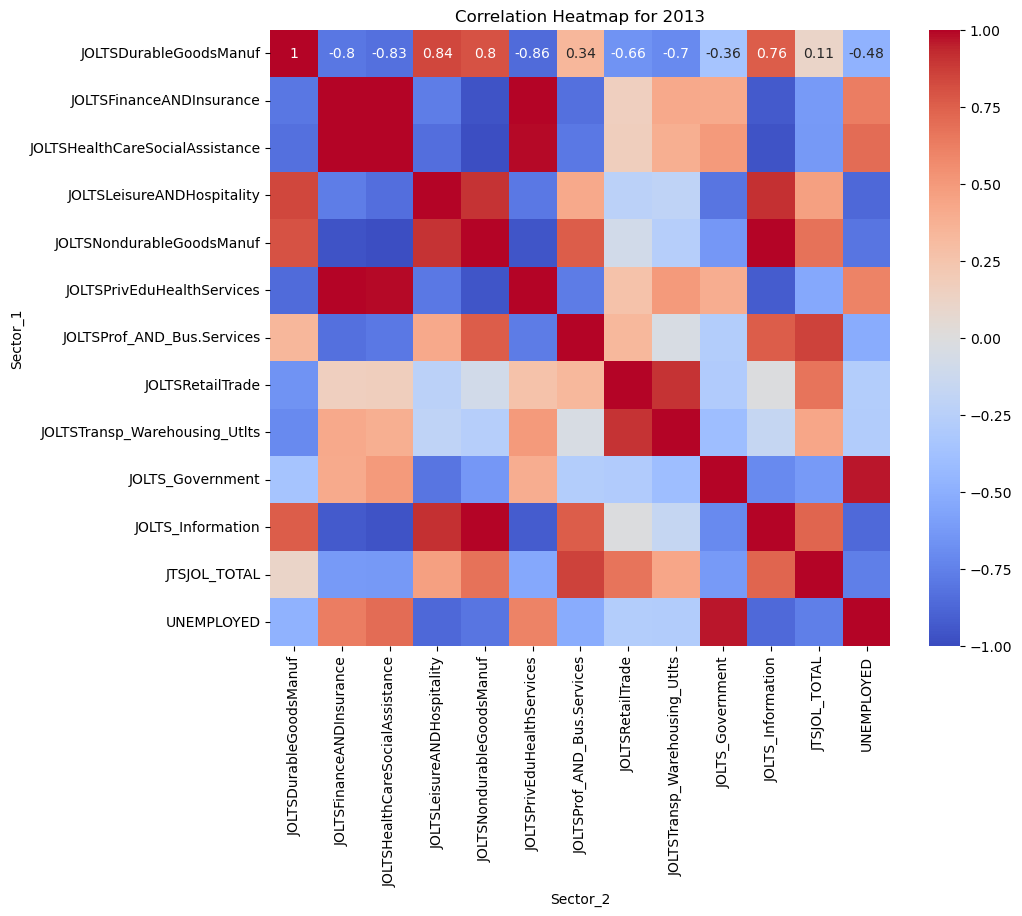

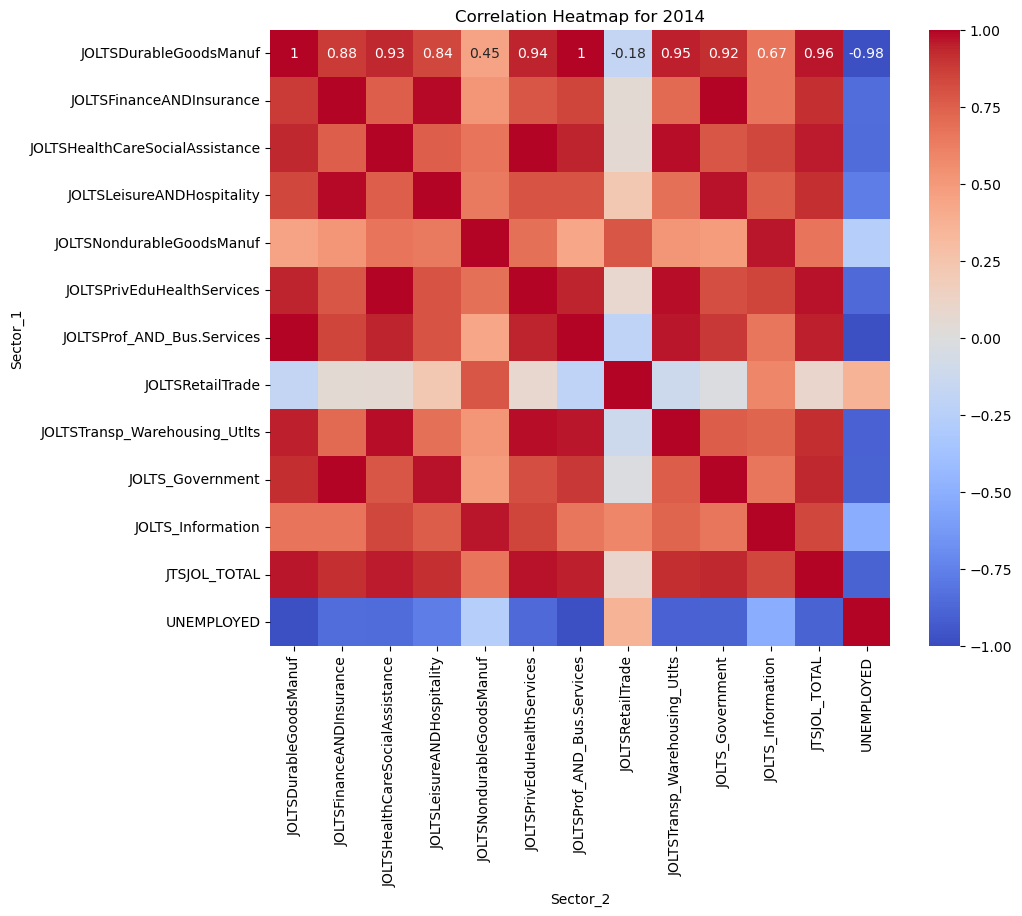

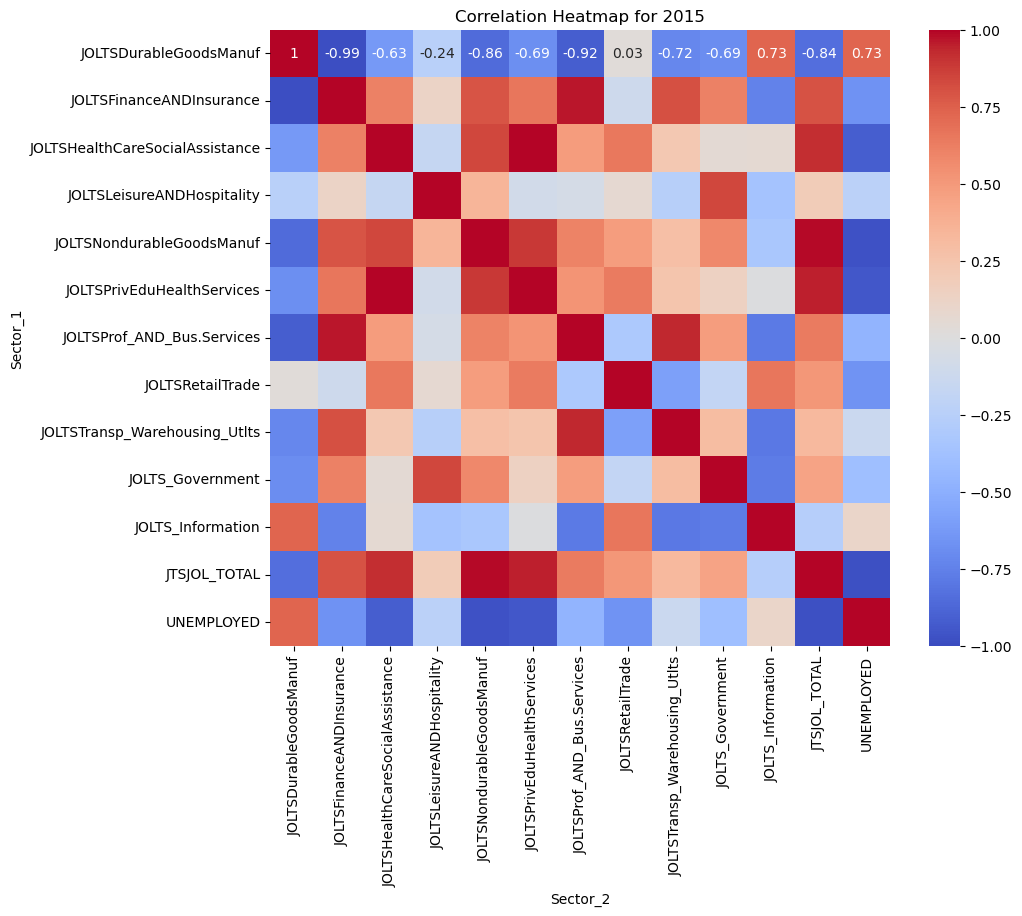

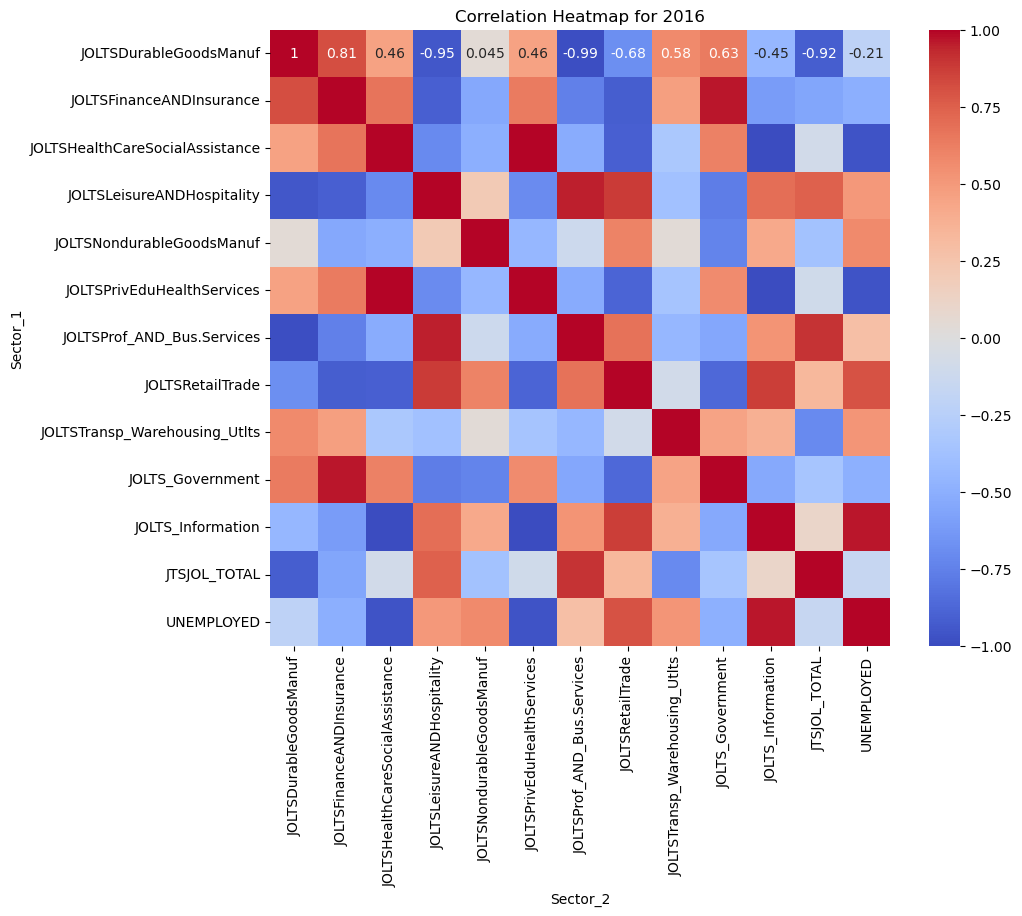

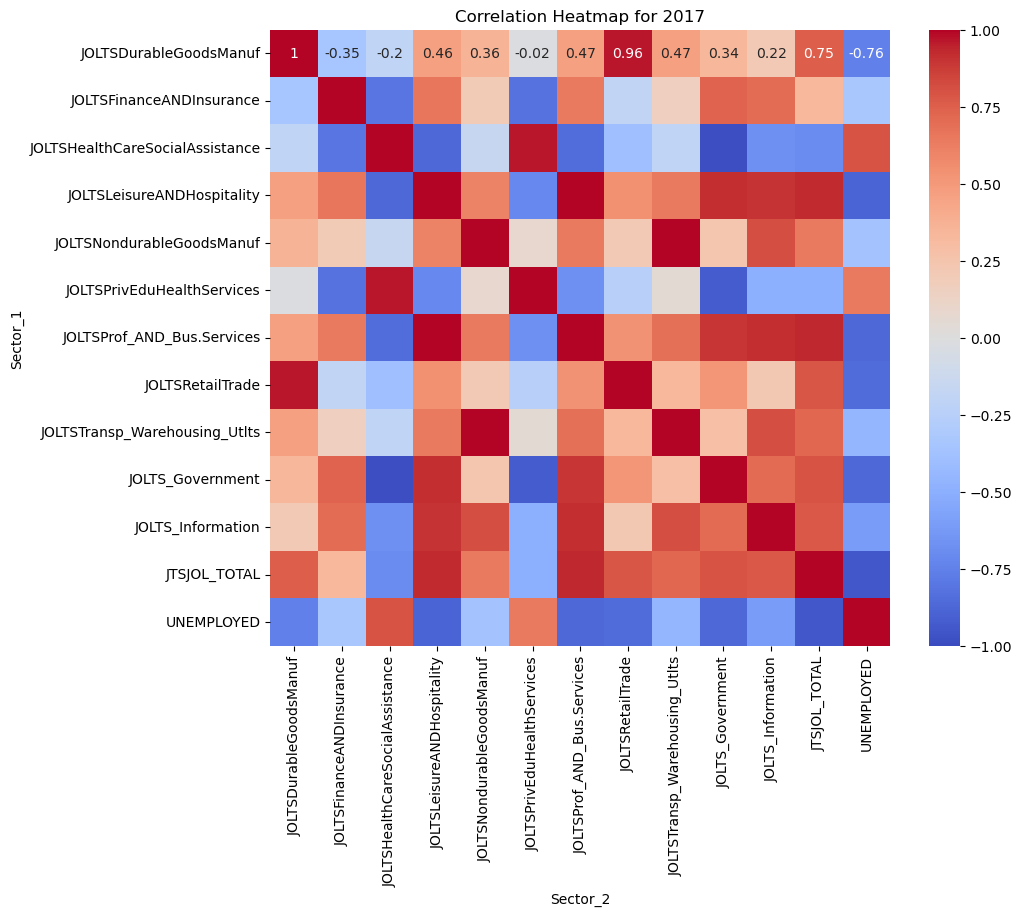

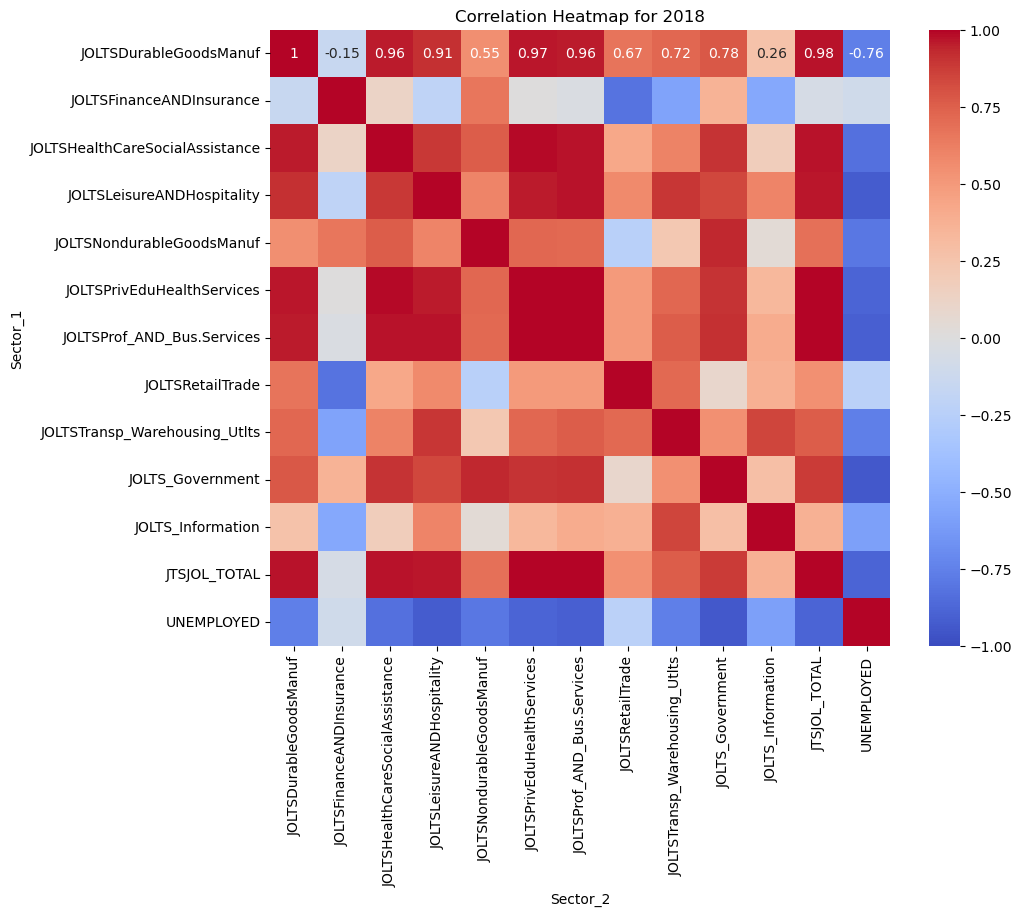

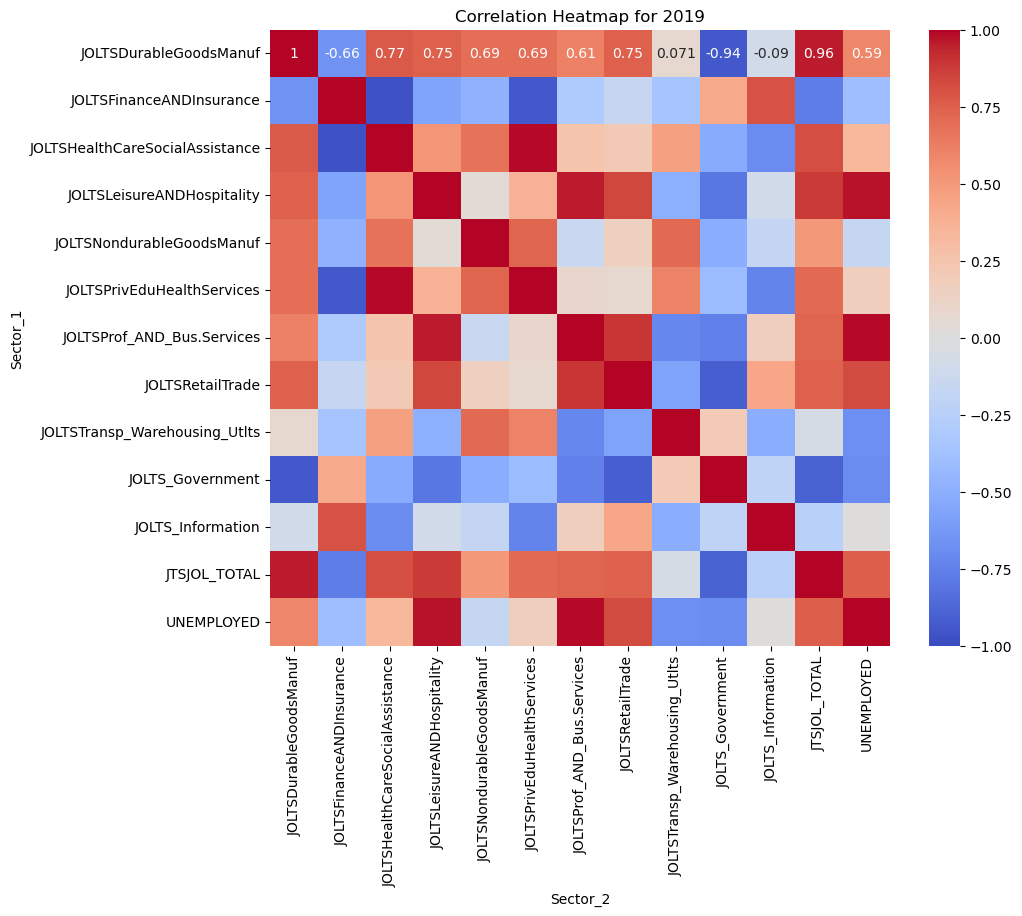

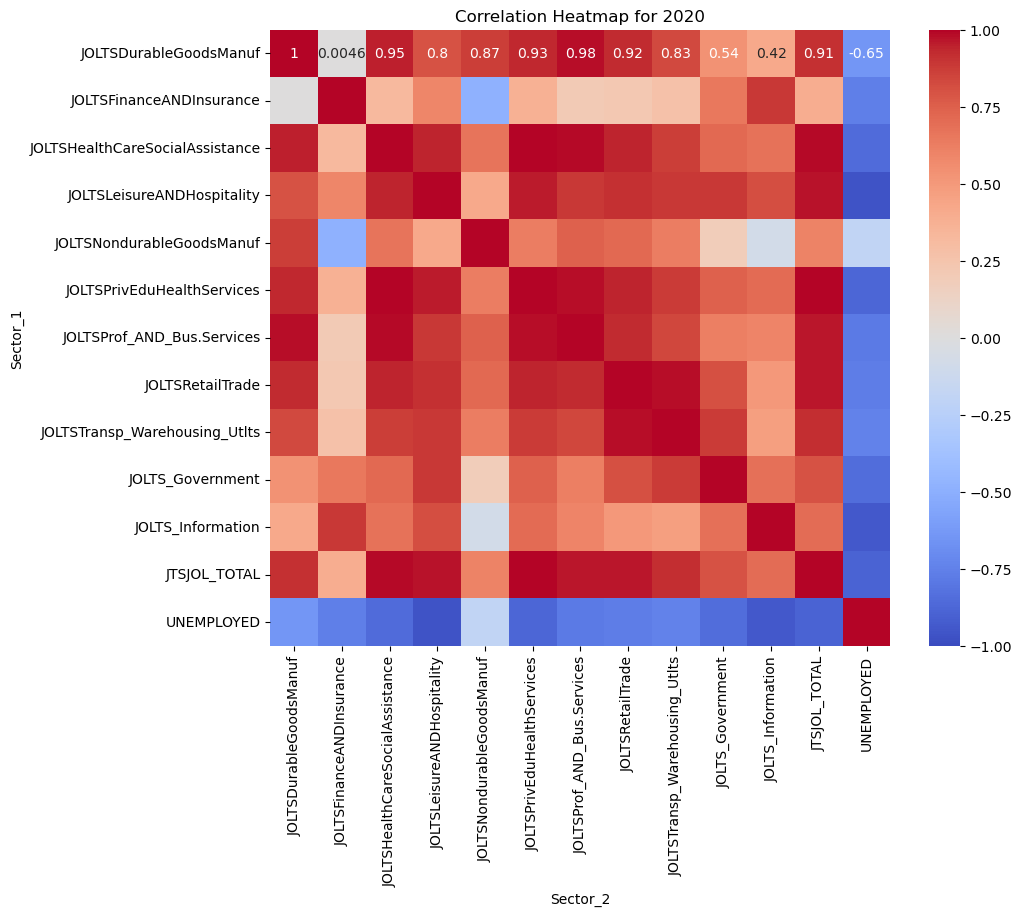

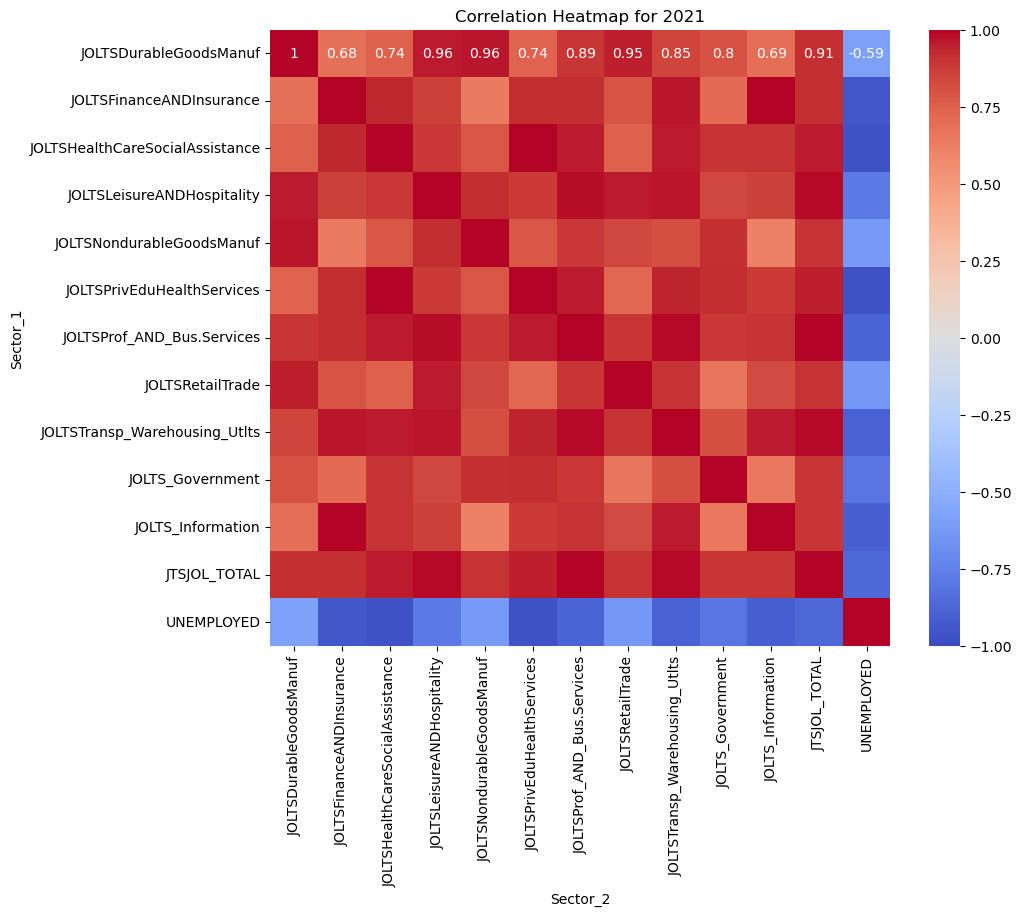

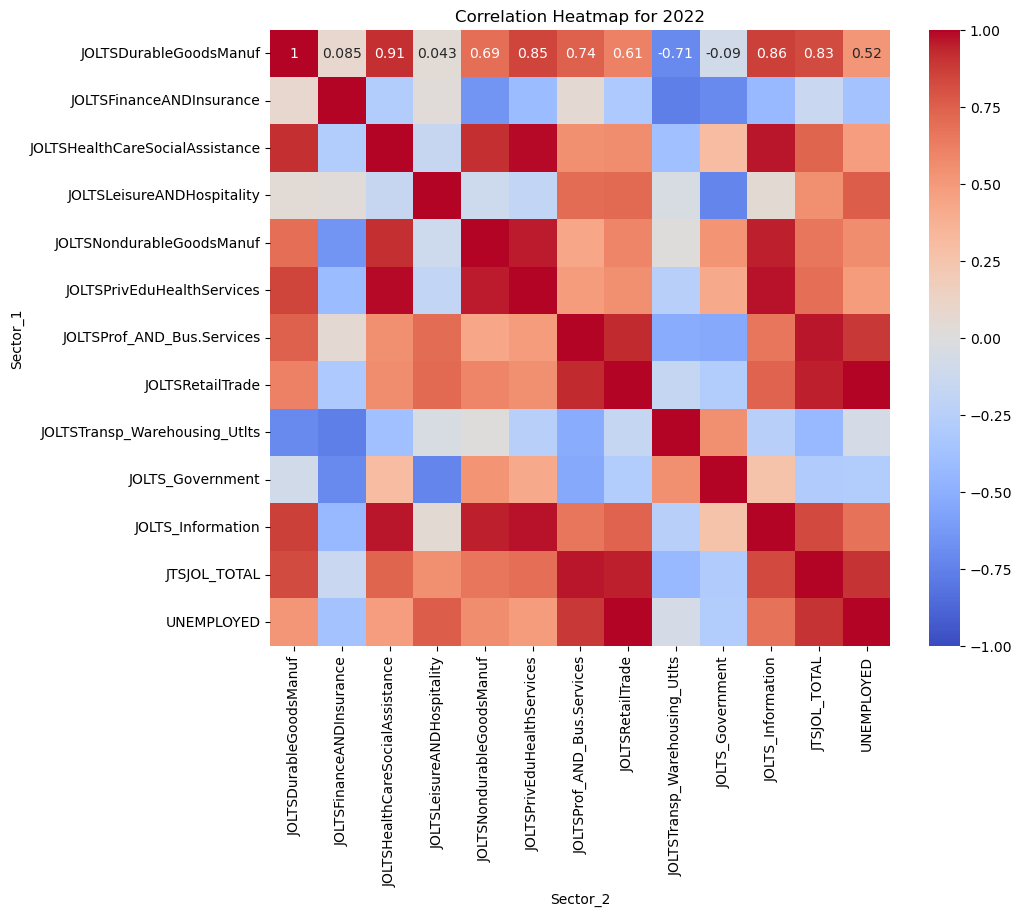

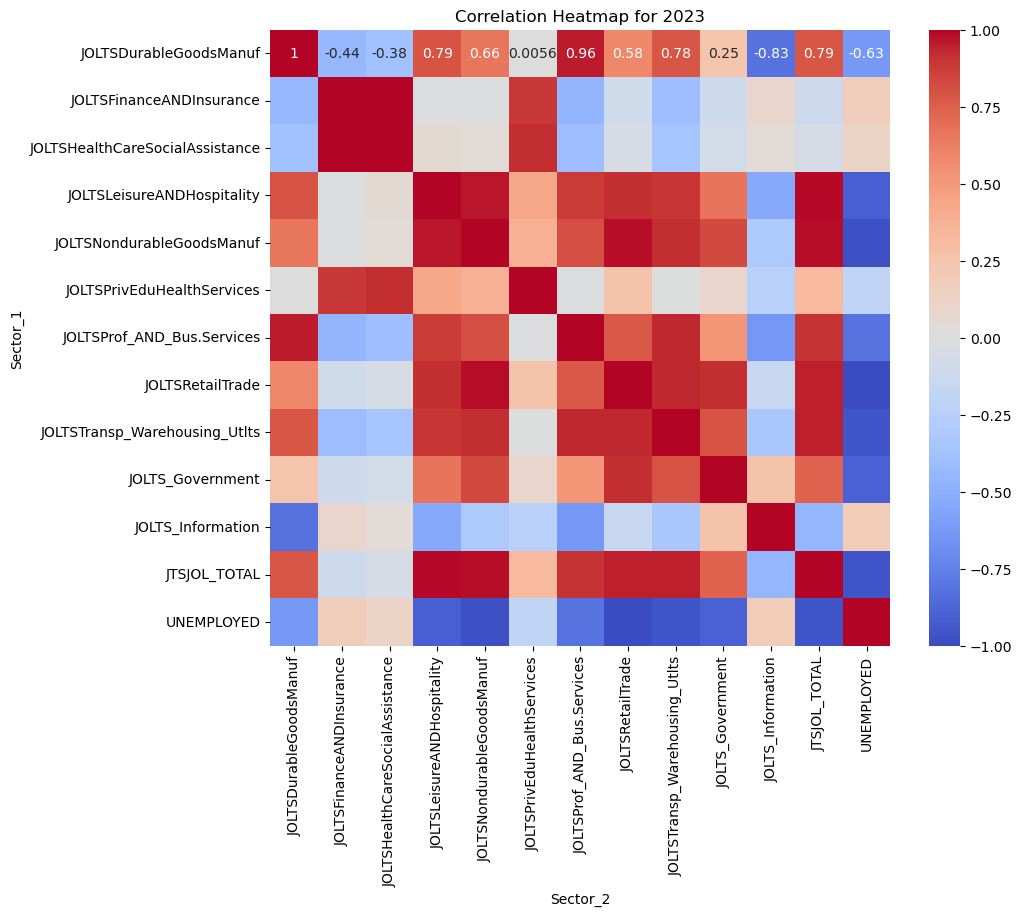

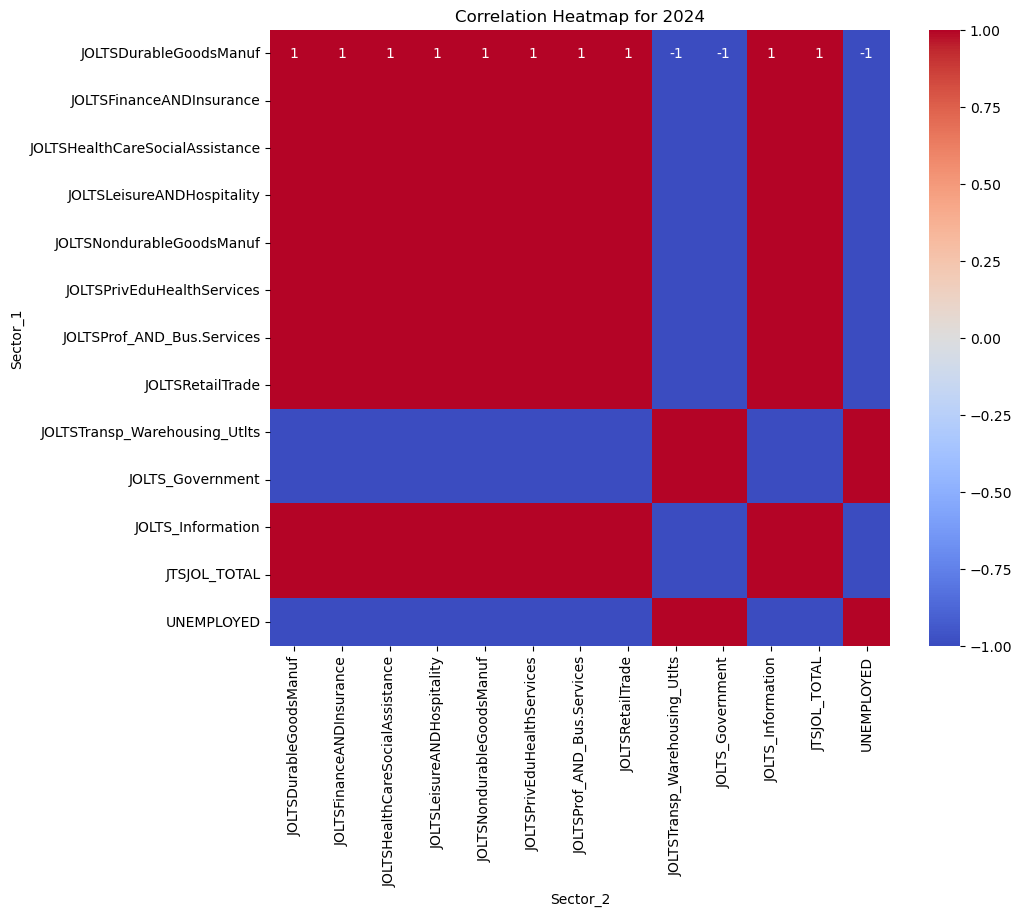

In [35]:
# Get the unique years from the data
years = sorted(correlation_by_year_df['Year'].unique())

# Loop through each year and generate a heatmap
for year in years:
    # Filter correlation data for the current year
    correlation_matrix_for_year = correlation_by_year_df[correlation_by_year_df['Year'] == year]

    # Pivot the DataFrame to create a matrix format
    correlation_matrix_pivot = correlation_matrix_for_year.pivot(index='Sector_1', columns='Sector_2', values='Correlation')

    # Plot the heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix_pivot, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

    # Customize the plot
    plt.title(f'Correlation Heatmap for {year}')

    # Save the heatmap as an image (PNG format)
    plt.savefig(f'correlation_heatmap_{year}.png')

    # Show the plot (optional, can be removed if you just want to save the files)
    plt.show()

    # Close the figure to avoid displaying it multiple times
    plt.close()

